In [ ]:

%matplotlib inline
from fastai.basics import *

In [ ]:
n=100

In [ ]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3526,  1.0000],
        [ 0.2951,  1.0000],
        [-0.5608,  1.0000],
        [-0.5168,  1.0000],
        [ 0.5404,  1.0000]])

In [ ]:
a = tensor(3.,2); a

tensor([3., 2.])

In [ ]:
y = x@a + 0.25*torch.randn(n)

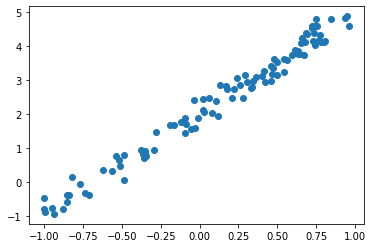

In [ ]:
plt.scatter(x[:,0], y);

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [ ]:

a = tensor(-1.,1)

In [ ]:
y_hat = x@a
mse(y_hat, y)

tensor(7.1868)

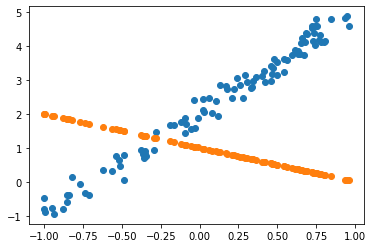

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [ ]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [ ]:
lr = 1e-1
for t in range(100): update()

tensor(7.1868, grad_fn=<MeanBackward0>)
tensor(1.2802, grad_fn=<MeanBackward0>)
tensor(0.3974, grad_fn=<MeanBackward0>)
tensor(0.1542, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0653, grad_fn=<MeanBackward0>)
tensor(0.0597, grad_fn=<MeanBackward0>)
tensor(0.0581, grad_fn=<MeanBackward0>)
tensor(0.0577, grad_fn=<MeanBackward0>)
tensor(0.0575, grad_fn=<MeanBackward0>)


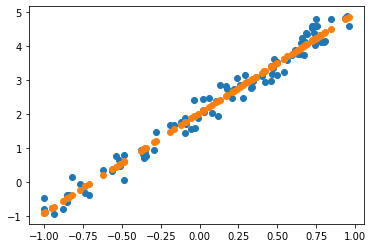

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Conclusion
* Learning rate needs to be in range so that we neither over step the minimum nor converge very slowly towards it.

* A good validation set helps check models performance on unseen data and tells us if our model is over fitting or underfitting.

* SGD uses mini batches, which helps deal with larger dataset as gradient is calculated across entire batch before any updates are made.
